In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
import tensorflow as tf
from sklearn.metrics import r2_score

In [35]:

df = pd.read_csv('/kaggle/input/rbpffdata/RBPFF.csv')  
metric = 'weighted_avg_touchdowns'  
#weighted_avg_yards_after_contact - Measures the yardage gained after the initial hit, showing a player’s ability to push through tackles and gain extra yards.
#weighted_avg_touchdowns - Indicates the player’s scoring ability, directly impacting the game's outcome.
#weighted_avg_first_downs - Reflects how often the HB helps advance the team toward new downs, keeping drives alive.
#weighted_avg_elu_rush_mtf (Missed Tackles Forced on rushes) - Shows how elusive the HB is, specifically on rushing attempts, by avoiding tackles.
#weighted_avg_breakaway_yards - Measures explosive plays, capturing the ability to make large gains on single plays, which can change the momentum of a game.

In [36]:
print(df.columns)
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())

Index(['Unnamed: 0', 'position', 'weighted_avg_attempts',
       'weighted_avg_avoided_tackles', 'weighted_avg_breakaway_attempts',
       'weighted_avg_breakaway_percent', 'weighted_avg_breakaway_yards',
       'weighted_avg_declined_penalties', 'weighted_avg_designed_yards',
       'weighted_avg_drops', 'weighted_avg_elu_recv_mtf',
       'weighted_avg_elu_rush_mtf', 'weighted_avg_elu_yco',
       'weighted_avg_elusive_rating', 'weighted_avg_explosive',
       'weighted_avg_first_downs', 'weighted_avg_franchise_id',
       'weighted_avg_fumbles', 'weighted_avg_gap_attempts',
       'weighted_avg_grades_hands_fumble', 'weighted_avg_grades_offense',
       'weighted_avg_grades_offense_penalty', 'weighted_avg_grades_pass',
       'weighted_avg_grades_pass_block', 'weighted_avg_grades_pass_route',
       'weighted_avg_grades_run', 'weighted_avg_grades_run_block',
       'weighted_avg_longest', 'weighted_avg_penalties',
       'weighted_avg_rec_yards', 'weighted_avg_receptions',
       'w

Processing team: 49ers, data length: 5
Processing team: Bears, data length: 5
Processing team: Bengals, data length: 5
Processing team: Bills, data length: 5
Processing team: Broncos, data length: 5
Processing team: Browns, data length: 5
Processing team: Buccaneers, data length: 5
Processing team: Cardinals, data length: 5
Processing team: Chargers, data length: 5
Processing team: Chiefs, data length: 5
Processing team: Colts, data length: 5
Processing team: Commanders, data length: 5
Processing team: Cowboys, data length: 5
Processing team: Dolphins, data length: 5
Processing team: Eagles, data length: 5
Processing team: Falcons, data length: 5
Processing team: Giants, data length: 5
Processing team: Jaguars, data length: 5
Processing team: Jets, data length: 5
Processing team: Lions, data length: 5
Processing team: Packers, data length: 5
Processing team: Panthers, data length: 5
Processing team: Patriots, data length: 5
Processing team: Raiders, data length: 5
Processing team: Rams

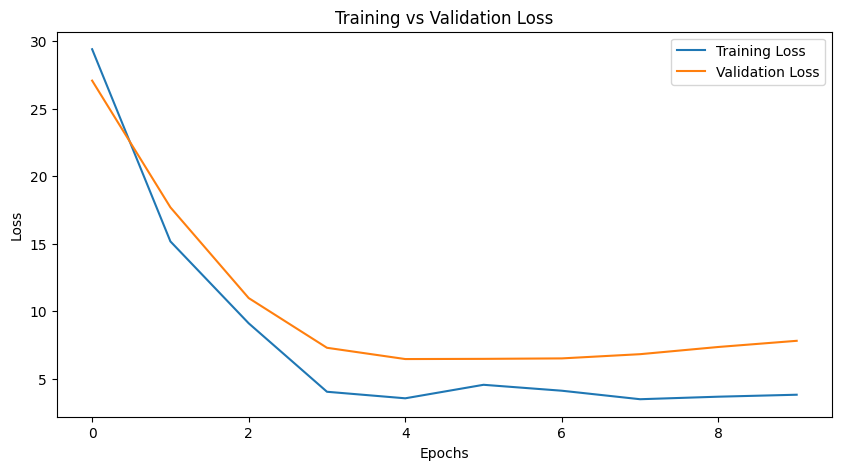

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
R² Score: -0.0689


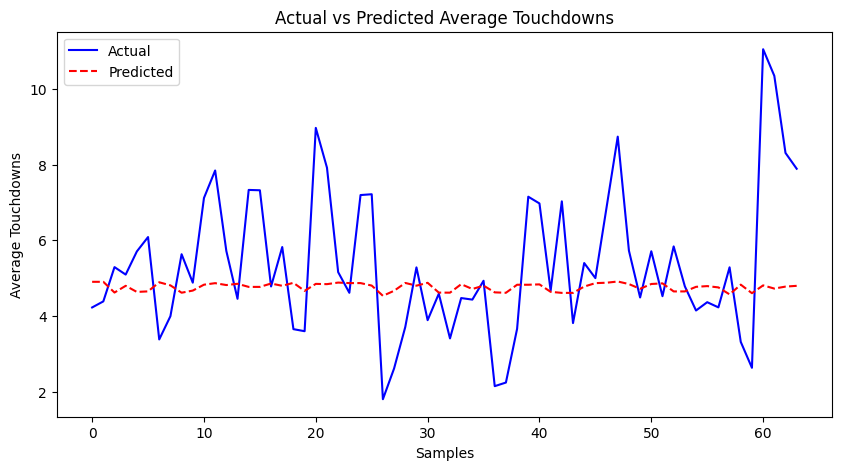

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.5891 - val_loss: 7.8424
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9672 - val_loss: 7.6406
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.3889 - val_loss: 7.2685
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.2794 - val_loss: 7.0765
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.2288 - val_loss: 7.0764
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.0992 - val_loss: 6.9172
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4267 - val_loss: 6.8086
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.1421 - val_loss: 6.8019
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5095 - val_loss: 6.9626
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.4932 - val_loss: 7.1850
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4218 - val_loss: 7.4097
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.7871 - val_loss: 7.3798
E

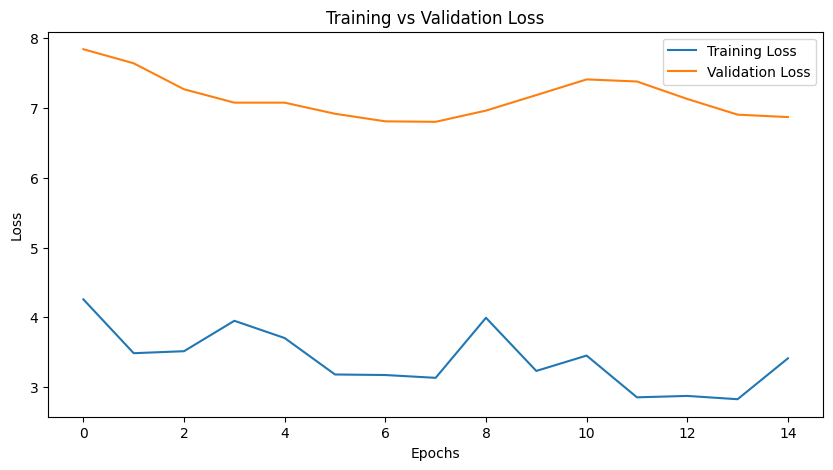

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R² Score: 0.0483


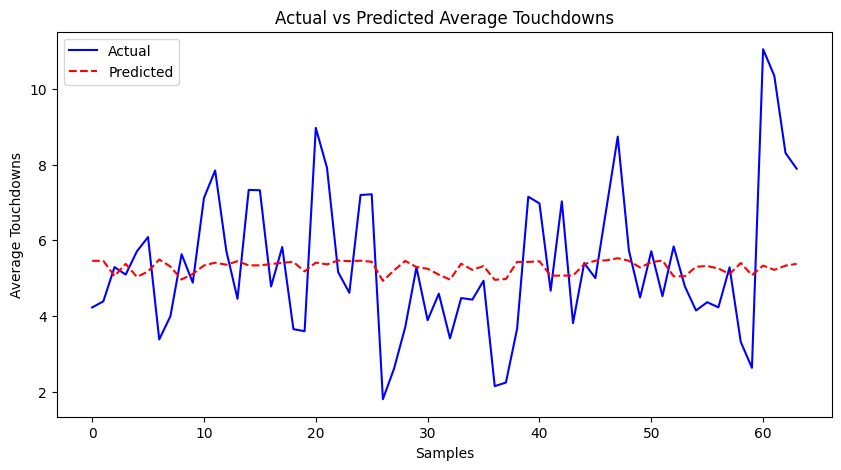

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.7728 - val_loss: 7.1039
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.0291 - val_loss: 7.6561
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.7028 - val_loss: 7.8074
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.9302 - val_loss: 7.5213
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.0847 - val_loss: 7.4168
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.7256 - val_loss: 7.2723
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5440 - val_loss: 7.1750
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3940 - val_loss: 6.9964
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.0637 - val_loss: 6.9399
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2734 - val_loss: 7.0028
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.8919 - val_loss: 7.0651
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9979 - val_loss: 7.2268
E

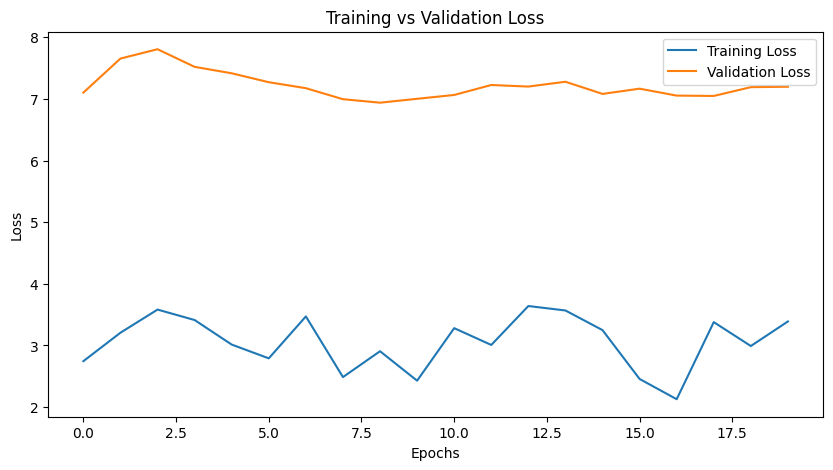

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R² Score: 0.0499


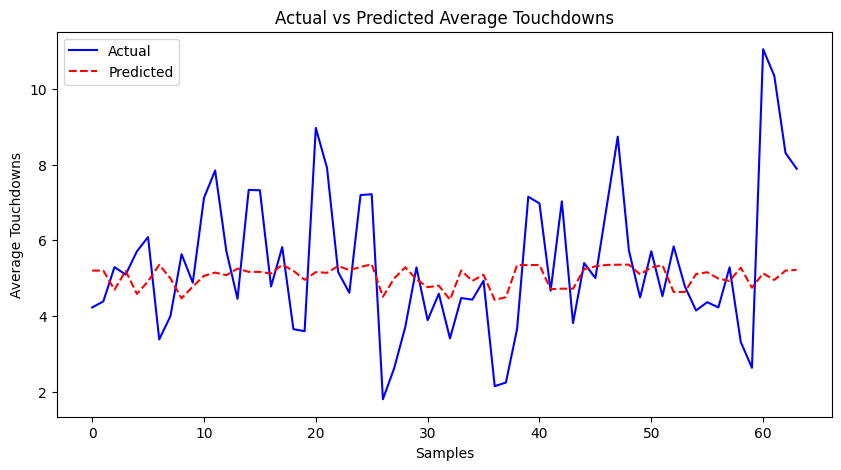

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3.7410 - val_loss: 7.1671
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.5334 - val_loss: 7.0401
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.9612 - val_loss: 7.0210
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7354 - val_loss: 6.9496
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.9399 - val_loss: 7.0426
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.7186 - val_loss: 7.1491
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.4994 - val_loss: 7.1791
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6972 - val_loss: 7.0737
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.4206 - val_loss: 7.1173
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8413 - val_loss: 7.0612
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.0592 - val_loss: 6.9556
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8583 - val_loss: 6.9077
E

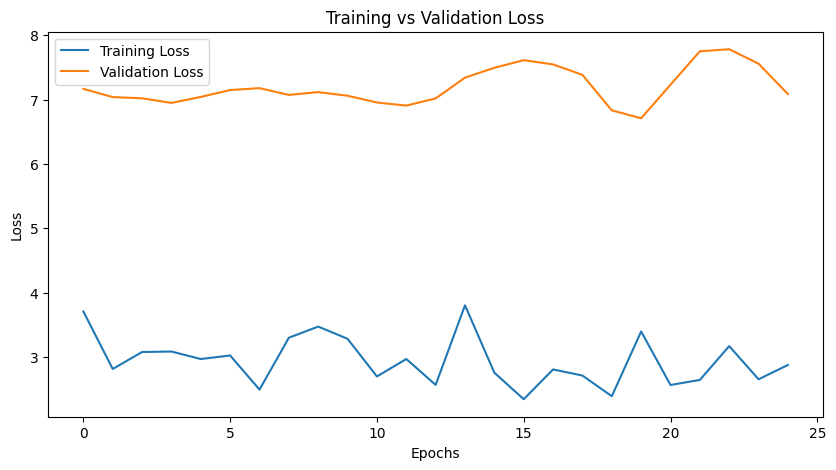

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R² Score: 0.0862


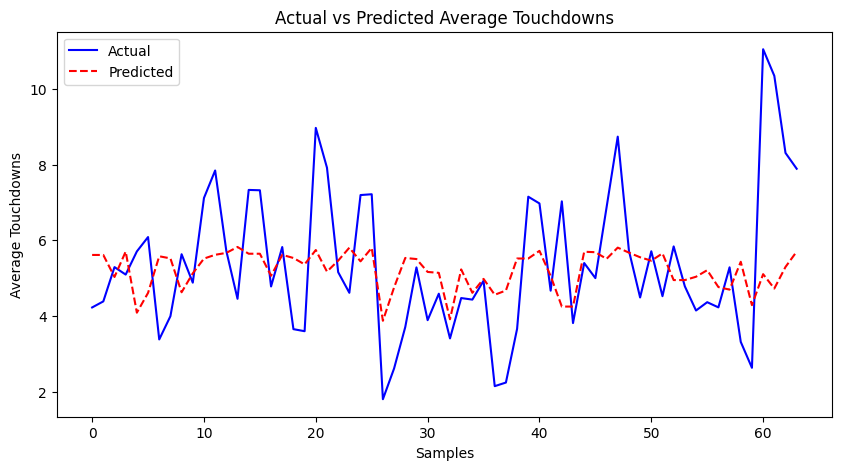

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.9900 - val_loss: 6.9132
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.4405 - val_loss: 7.0570
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2603 - val_loss: 7.4756
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.8736 - val_loss: 7.5435
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9501 - val_loss: 7.2402
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.6658 - val_loss: 7.1350
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.7396 - val_loss: 7.2963
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1686 - val_loss: 7.0933
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.2526 - val_loss: 6.8062
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3156 - val_loss: 6.9713
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4770 - val_loss: 7.3088
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8382 - val_loss: 7.2881
E

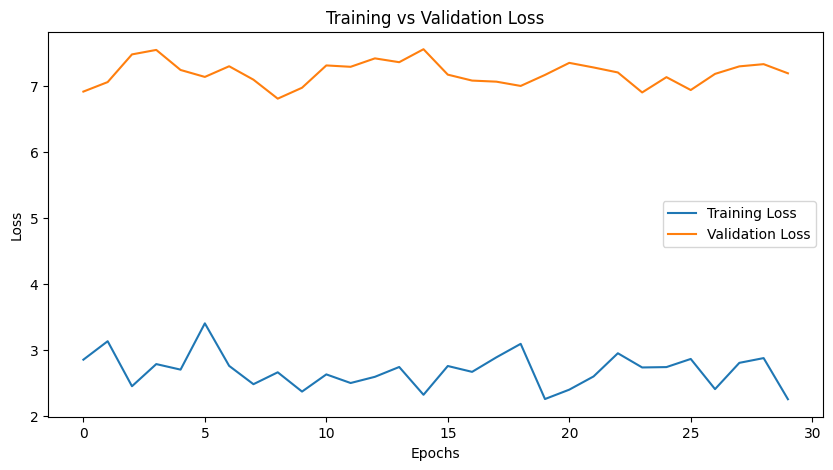

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
R² Score: 0.0993


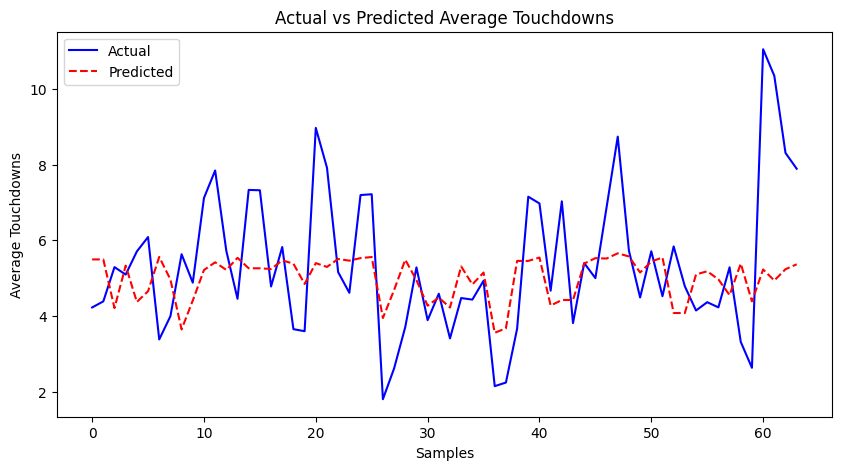

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.2959 - val_loss: 7.1162
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.8614 - val_loss: 7.2875
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.0870 - val_loss: 7.0341
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.0524 - val_loss: 7.0836
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9258 - val_loss: 7.2049
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4109 - val_loss: 7.3444
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3581 - val_loss: 6.8202
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.0849 - val_loss: 6.6328
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2794 - val_loss: 7.3064
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9476 - val_loss: 7.5748
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6894 - val_loss: 8.4237
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.5342 - val_loss: 7.2375
E

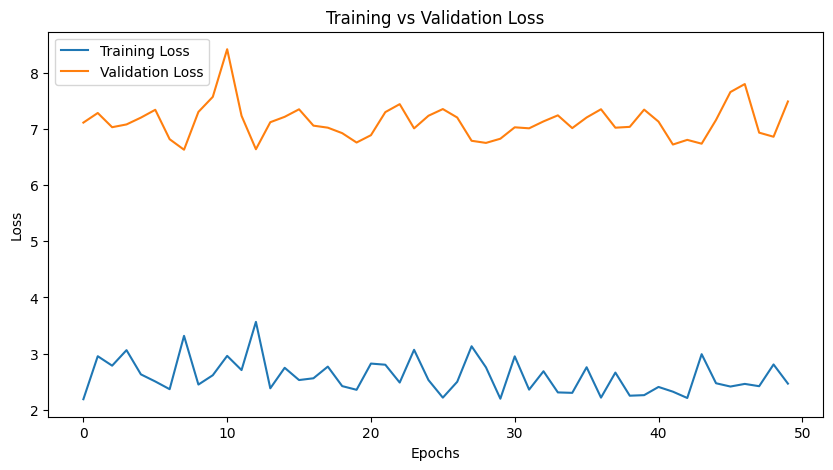

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R² Score: 0.1040


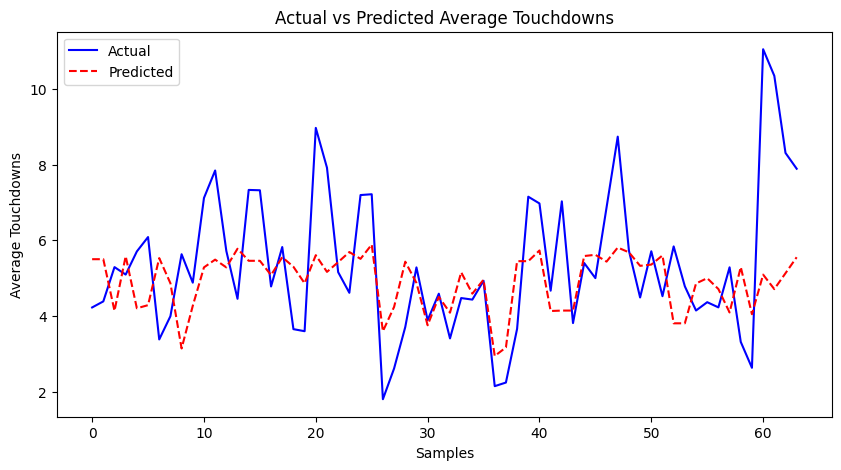

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.2934 - val_loss: 7.8020
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.3528 - val_loss: 7.4917
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9685 - val_loss: 6.9739
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.3849 - val_loss: 7.1988
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1225 - val_loss: 7.5326
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6825 - val_loss: 7.3684
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.5458 - val_loss: 7.2539
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9676 - val_loss: 7.1537
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9410 - val_loss: 7.0463
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.8209 - val_loss: 6.9953
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4583 - val_loss: 6.9785
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.7712 - val_lo

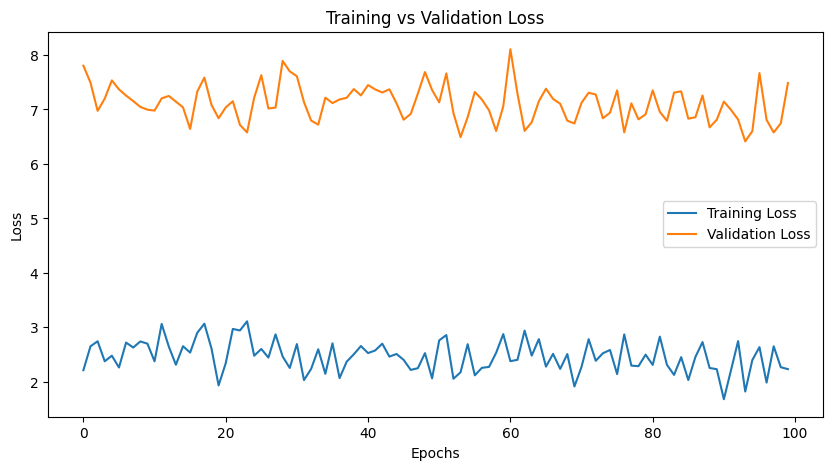

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R² Score: 0.1163


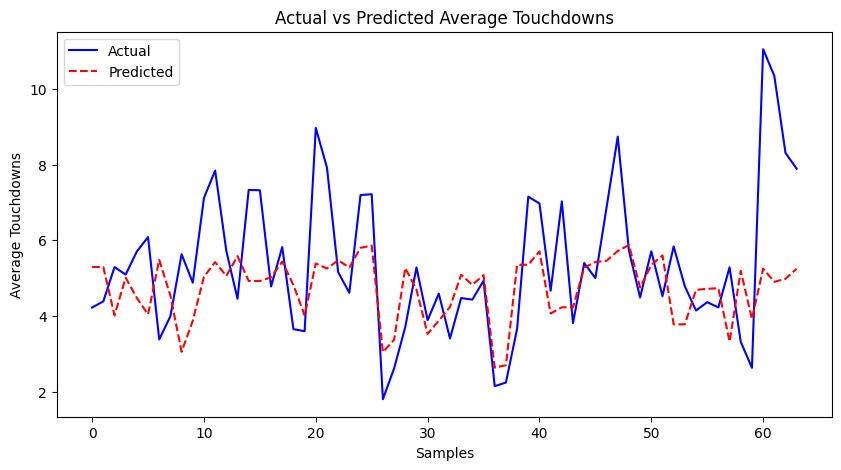

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.5480 - val_loss: 6.8451
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3168 - val_loss: 6.6048
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1348 - val_loss: 6.8290
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6727 - val_loss: 7.1020
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.7620 - val_loss: 6.9615
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.8582 - val_loss: 6.8627
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9124 - val_loss: 6.0924
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.7116 - val_loss: 6.3792
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0989 - val_loss: 8.1919
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4104 - val_loss: 6.8645
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0496 - val_loss: 6.1245
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4697 - val_lo

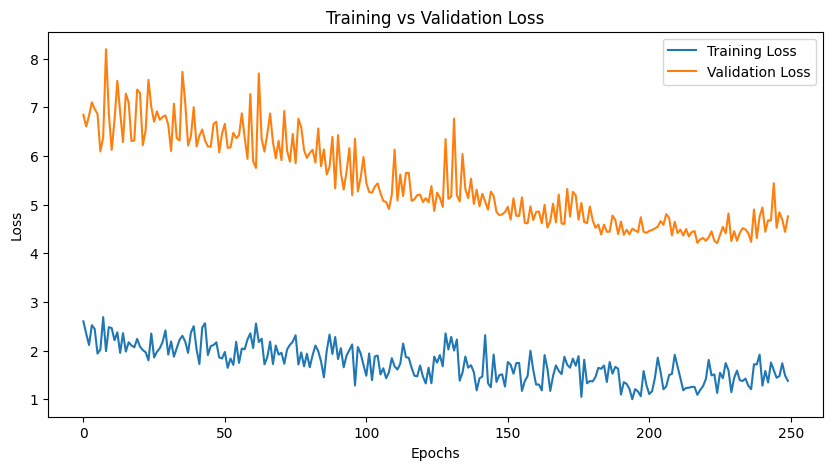

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R² Score: 0.4700


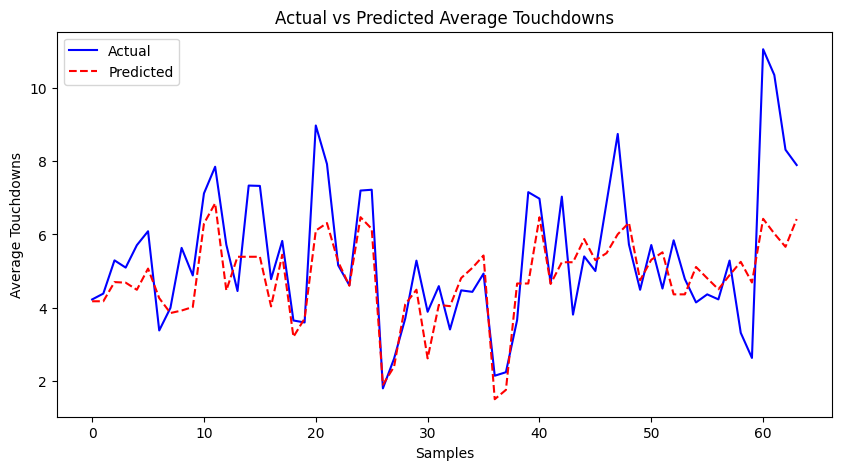

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.5830 - val_loss: 4.4102
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1996 - val_loss: 4.4731
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2045 - val_loss: 5.4655
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5494 - val_loss: 4.7178
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0581 - val_loss: 4.7568
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2557 - val_loss: 4.4912
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1417 - val_loss: 4.5161
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2158 - val_loss: 4.7039
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3891 - val_loss: 4.8191
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1935 - val_loss: 4.5722
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9542 - val_loss: 4.5342
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4531 - val_lo

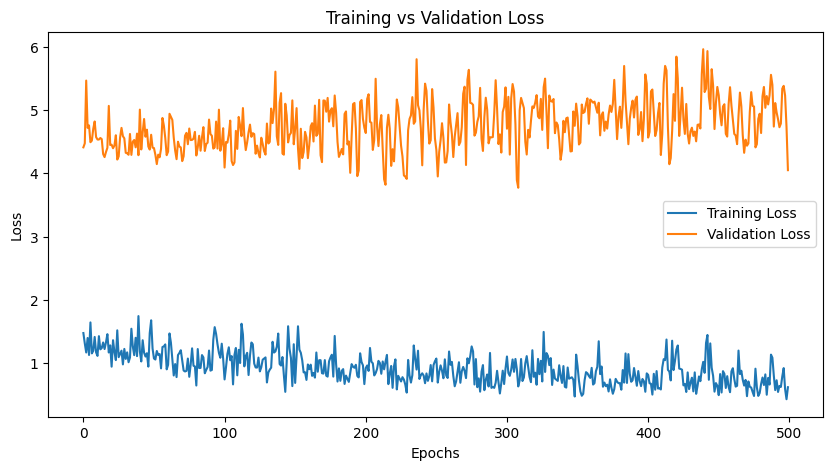

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R² Score: 0.6501


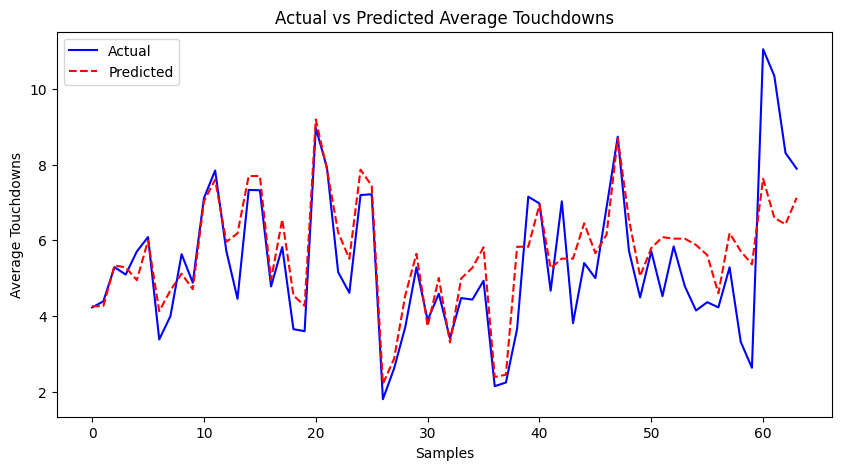

In [37]:

# Prepare sequences and targets
sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['weighted_avg_attempts', 'weighted_avg_avoided_tackles', 'weighted_avg_breakaway_attempts', 
                                           'weighted_avg_breakaway_percent', 'weighted_avg_breakaway_yards', 'weighted_avg_designed_yards', 
                                           'weighted_avg_drops', 'weighted_avg_elu_rush_mtf']]  # HB relevant features
            
            # Calculate the target: Average touchdowns over the next year (for simplicity, use the previous touchdown metric)
            target = np.mean(group.iloc[i+1:i+4]['weighted_avg_touchdowns'])  # Average touchdowns over the next 3 years
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")  # Check shape before reshaping
print(X)

# Define the input layer for the model
inputs = Input(shape=(3, X.shape[2]))  # 3 time steps, number of features inferred from data

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=X.shape[2])(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)
#testing: increasing units make perfomance decrease

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting average touchdowns
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to monitor validation loss
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
##early stopping made r^2 values worse

# Train the model
epoch_list = [10, 15, 20, 25, 30, 50, 100, 250,500]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=15, validation_split=0.2)
    #increasing batch size lowers accuracy for all epochs except 500 .58->.6
    
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Make predictions on the test set
    y_pred = model.predict(X)

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Average Touchdowns')
    plt.xlabel('Samples')
    plt.ylabel('Average Touchdowns')
    plt.legend()
    plt.show()
